In [3]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import ipdb
import tensorflow as tf
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\katiii\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
raw_data = np.load('./data.npz')
x_train = raw_data['X_train']
y_train = raw_data['y_train']
x_test = raw_data['X_test']
y_test = raw_data['y_test']
for j in range(len(x_train)):
    for i in range(len(x_train)):
        if(x_train[j][i]==1):
            print(i)
    print("****")
   

34
80
130
158
294
298
314
352
378
426
448
561
588
597
650
835
879
****
249
695
807
841
****
389
736
745
807
896
****
80
294
661
****
34
80
97
130
294
352
378
426
448
449
588
597
835
****
202
333
529
561
695
807
841
899
****
34
80
130
158
294
314
352
378
426
448
588
597
650
835
879
****
13
24
60
80
97
192
193
252
293
294
305
314
322
368
561
597
650
656
695
718
722
875
****
151
165
181
216
352
366
561
666
816
843
875
****
80
224
294
314
325
650
713
****
1
47
80
116
124
283
310
326
383
582
631
650
694
776
807
881
****
1
52
69
91
127
193
322
349
389
534
549
562
573
650
674
694
695
790
807
862
875
****
80
294
591
661
704
794
****
203
641
****
164
354
366
561
650
715
716
753
838
871
****
105
381
408
455
519
561
562
622
713
728
745
760
807
823
875
****
155
314
419
441
481
547
650
656
695
749
841
848
****
249
695
807
841
****
191
193
216
286
322
561
650
695
718
807
816
843
881
****
541
901
****
0
314
378
600
650
713
750
806
834
****
1
151
283
****
204
235
503
875
****
1
80
222
294
482
807
****

650
662
694
695
739
773
****
728
****
227
389
694
****
80
106
114
244
803
****
7
16
84
88
105
182
242
314
408
479
504
519
529
562
622
650
728
760
807
841
****
5
80
136
197
235
294
298
301
314
378
440
592
650
725
794
821
832
875
881
****
1
29
80
227
231
263
314
348
430
510
587
611
650
666
703
807
856
****
1
150
181
283
314
327
650
713
828
****
7
16
61
84
88
121
182
239
242
314
408
479
504
519
529
622
650
758
841
****
80
222
294
473
541
591
794
807
****
145
650
695
807
823
841
****
113
156
304
504
554
561
569
668
807
808
****
80
145
147
294
606
650
695
759
807
888
****
160
354
378
379
401
489
600
695
841
898
****
151
165
181
216
352
366
561
680
816
875
876
****
135
165
216
314
326
352
378
389
561
624
650
724
732
736
765
798
816
825
843
875
881
****
1
69
80
118
125
131
147
650
695
807
845
846
****
72
113
314
332
506
544
650
733
780
808
****
1
80
283
294
406
591
739
794
****
114
171
245
350
650
805
807
849
875
****
80
114
294
295
344
392
803
862
****
235
314
535
650
****
80
222
294
473
541

590
622
650
758
775
807
****
168
302
378
379
489
600
658
****
80
251
268
294
314
389
556
650
665
713
772
****
165
216
561
592
661
875
****
14
675
****
52
109
192
317
366
486
561
601
631
650
694
695
699
807
841
875
****
1
13
52
69
91
114
127
147
193
283
322
366
379
389
507
561
562
596
650
674
690
695
764
790
807
809
862
875
888
****
80
314
614
650
655
694
713
****
80
294
319
331
350
354
407
532
650
715
716
753
782
794
833
838
875
881
****
33
114
392
745
807
****
31
80
294
401
591
694
794
****
75
218
314
327
366
389
650
832
875
883
892
****
1
52
69
91
123
127
193
322
389
534
562
650
674
695
764
790
807
862
875
****
523
656
****
114
392
469
695
841
****
7
74
106
117
142
165
216
237
314
352
366
378
561
650
724
807
816
843
875
****
1
80
224
283
294
314
325
623
650
713
739
795
****
13
80
147
167
294
312
650
695
794
807
846
870
****
80
294
389
591
794
****
80
147
184
191
259
294
322
389
429
555
562
650
695
703
807
875
****
74
92
217
248
252
378
427
534
592
597
650
656
805
807
881
888
****
16


****
13
24
97
192
293
322
354
597
601
650
675
695
715
716
718
751
753
799
838
841
875
****
41
80
197
255
333
378
387
389
622
638
650
715
753
807
838
839
****
7
23
28
34
49
74
80
127
130
138
222
294
314
352
378
426
448
473
481
527
588
650
807
835
881
****
14
80
195
294
591
650
695
794
807
841
****
31
80
294
401
591
694
794
****
1
69
165
184
191
216
283
330
561
585
592
650
695
703
807
875
****
674
790
888
****
494
725
901
****
314
650
703
****
1
314
356
389
460
650
757
807
881
****
807
****
80
114
294
295
371
392
591
698
794
807
****
29
80
114
294
334
484
591
712
794
832
890
****
322
345
499
610
650
695
807
875
888
****
80
294
389
591
794
****
389
496
888
****
322
875
****
346
352
725
890
****
13
24
97
192
366
372
387
561
582
597
601
661
675
695
841
875
****
80
222
294
473
541
591
794
807
****
319
350
650
715
888
****
65
203
346
352
680
725
729
****
114
286
803
****
1
565
****
1
314
352
650
****
29
80
114
294
298
484
794
832
890
****
80
195
294
650
693
695
807
841
898
****
516
****
57
84

In [4]:
print(np.shape(x_train))
print(np.shape(x_test))

(902, 2048)
(226, 2048)


In [17]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv=nn.Sequential(
            nn.Conv1d(1,16,kernel_size=8,stride=2),
            nn.MaxPool1d(kernel_size=2,stride=2),
            nn.ELU(),
            nn.Conv1d(16,32,kernel_size=4,stride=2),
            nn.AvgPool1d(kernel_size=2,stride=2),
            nn.ELU(),
            nn.Conv1d(32,64,kernel_size=2,stride=1),
            nn.AvgPool1d(kernel_size=2,stride=2),
            nn.ELU(),
        )
        self.linear=nn.Sequential(
            nn.Linear(4032,20,bias=True),
#             nn.Dropout2d(p=0.5),
            
            nn.ELU(),
            nn.Linear(20,1,bias=True),
#             nn.Dropout2d(p=0.5),
        )
    def forward(self, x):
        self.convf = self.conv(x)
#         print(self.convf.MaxPool1d)
#         self.convf=torch.mean(self.convf,dim=2,keepdim=True)
        output = self.linear(self.convf.view(-1,4032))
        return output

In [18]:
net=CNN()

In [19]:
num_epochs=50
criterion=torch.nn.MSELoss()
optimizer=torch.optim.Adam(net.parameters(),lr=0.0005)

In [20]:
for ephoc in range(num_epochs):
    sum_train=0
    for i in range(len(x_train)):
        optimizer.zero_grad() 
        CNN_input=torch.from_numpy(x_train[i]).view(-1,1,2048)
        CNN_input=CNN_input.float()
        output = net.forward(CNN_input)
        y = np.array([y_train[i]])
        y=torch.from_numpy(y).float()
        output=torch.squeeze(output,dim=0)
        sum_train=sum_train+((output.data.numpy()-y_train[i])**2)
        loss = criterion(output, y)
        loss.backward()                                   
        optimizer.step()
    print("mean square train=",sum_train/len(y_train))
    

mean square train= [4.2979193]
mean square train= [2.7243788]
mean square train= [2.097814]
mean square train= [1.819635]
mean square train= [1.5795116]
mean square train= [1.3524069]
mean square train= [1.1335385]
mean square train= [0.957491]
mean square train= [0.821038]
mean square train= [0.7119915]
mean square train= [0.6315841]
mean square train= [0.551838]
mean square train= [0.48309216]
mean square train= [0.43054298]
mean square train= [0.3840348]
mean square train= [0.36376172]
mean square train= [0.31925097]
mean square train= [0.28688267]
mean square train= [0.26556557]
mean square train= [0.2766986]
mean square train= [0.26072824]
mean square train= [0.23211178]
mean square train= [0.23319569]
mean square train= [0.23106244]
mean square train= [0.23032758]
mean square train= [0.20441367]
mean square train= [0.19325972]
mean square train= [0.19003843]
mean square train= [0.19383019]
mean square train= [0.18256746]
mean square train= [0.18894878]
mean square train= [0.19078

In [21]:
sum=0
y_tests=[]
y_preds=[]
for i in range(len(x_test)):
    CNN_input=torch.from_numpy(x_test[i]).view(-1,1,2048)
    CNN_input=CNN_input.float()
    output = net.forward(CNN_input)
    y_preds.append(output)
    y_tests.append(y_test[i])
#     print("output=",output[0][0]," real=",y_test[i])
    sum=sum+((output[0][0].data.numpy()-y_test[i])**2)
print(sum/len(x_test))
    

1.7578459531751862


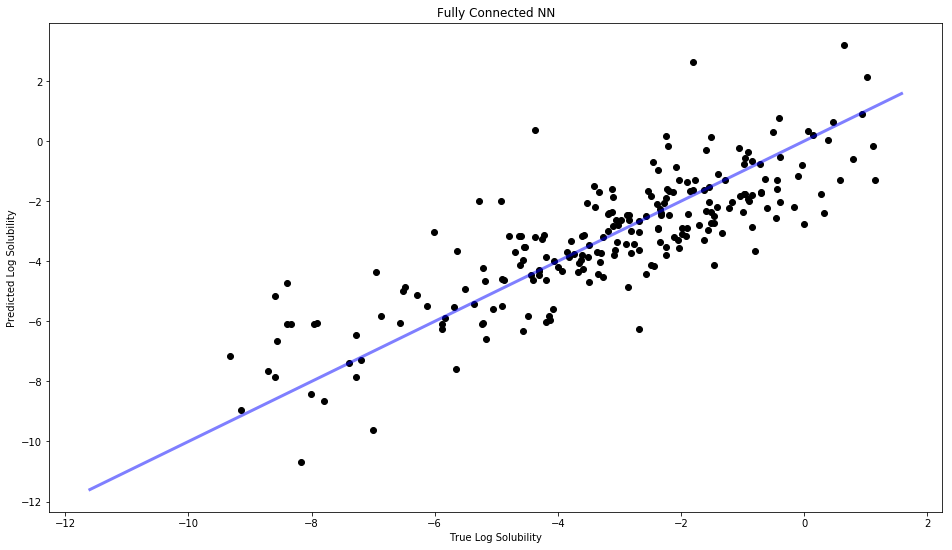

In [22]:
y_max, y_min = max(max(y_train),max(y_test)), min(min(y_train),min(y_test))
y_range = np.linspace(y_min,y_max,100)

y_tests=np.array(y_tests)
y_preds=np.array(y_preds)

fig, axs = plt.subplots(figsize=(16,9))

plt.scatter(y_tests, y_preds,c='k')
axs.plot(y_range, y_range, c='b', linewidth=3,alpha=0.5)
axs.set_title('Fully Connected NN')
axs.set_xlabel('True Log Solubility')
axs.set_ylabel('Predicted Log Solubility')
plt.show()

In [24]:
r2_score(y_tests, y_preds)

0.6618775867597763